# RQ4
What is the effect of increasing the number of texts re trieved and included in the prompt on the energy consumption of the entire RAG process?

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from results_processor import get_experiments_data, compute_total_energy_per_run, aggregate_rag_data, get_ci_deviation, compute_kruskal_wallis, compute_wilcoxon

plt.style.use("ggplot")
colors = sns.cubehelix_palette(start=2, rot=0.1, dark=0.2, light=.95, reverse=True)
color_map = sns.cubehelix_palette(start=2, rot=0.1, dark=0.2, light=.95, reverse=False, as_cmap=True)

### 1. Gemma 2 2B

In [2]:
gemma_experiments_data = get_experiments_data(
    "rq4_rq5_gemma",
    ["Total DRAM Power [W]", "IA Cores Power [W]", "GPU Rail Powers (avg) [W]"],
    ["embedding_start_time", "ask_model_end_time"],
)

gemma_runs_data = compute_total_energy_per_run(gemma_experiments_data)
gemma_retrieved_docs_variation_runs = aggregate_rag_data("rq4_rq5_gemma", gemma_runs_data)
gemma_retrieved_docs_variation_runs.insert(
    loc=3,
    column="Total Energy [J]",
    value=(
        gemma_retrieved_docs_variation_runs["IA Cores Energy [J]"]
        + gemma_retrieved_docs_variation_runs["DRAM Energy [J]"]
        + gemma_retrieved_docs_variation_runs["GPU Energy [J]"]
    ),
)
gemma_retrieved_docs_variation_runs

,IA Cores Energy [J],DRAM Energy [J],GPU Energy [J],Total Energy [J],duration [s],number retrieved docs,prompts_tokens_no,answers_tokens_no
run_index,,,,,,,,
0,47.93448,3.10618,41.15837,92.19903,2.400032,1,346,25
1,316.82937,21.76218,191.94780,530.53935,13.422673,1,453,207
2,157.93547,10.46364,89.03587,257.43498,6.946329,1,241,102
3,273.84951,17.91603,180.27812,472.04366,12.084191,1,390,200
4,121.80762,7.85026,95.34998,225.00786,5.509120,1,510,67
...,...,...,...,...,...,...,...,...
95,266.02620,29.13152,292.29871,587.45643,21.566297,5,1660,284
96,233.13158,25.55146,307.08810,565.77114,19.446069,5,1868,245
97,400.33400,43.77659,424.08113,868.19172,31.928821,5,1525,434


<Axes: >

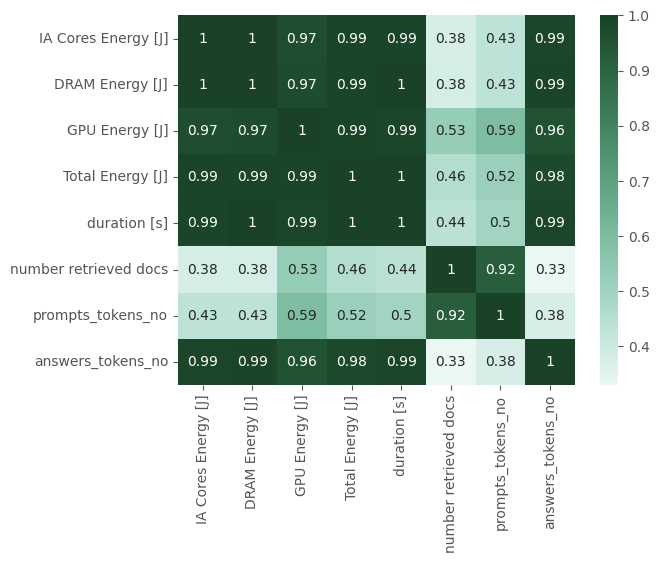

In [3]:
gemma_correlations = gemma_retrieved_docs_variation_runs.corr(method="spearman")
sns.heatmap(gemma_correlations, annot=True, cmap=color_map)

In [4]:
compute_kruskal_wallis(
    gemma_retrieved_docs_variation_runs, "number retrieved docs", [1, 2, 3, 4, 5], "duration [s]"
)

KruskalResult(statistic=np.float64(97.78524838323347), pvalue=np.float64(2.912322428579741e-20))

In [5]:
compute_kruskal_wallis(
    gemma_retrieved_docs_variation_runs,
    "number retrieved docs",
    [1, 2, 3, 4, 5],
    "Total Energy [J]",
)

KruskalResult(statistic=np.float64(106.52828838323376), pvalue=np.float64(4.001188872629205e-22))

In [6]:
for i in range(4):
    print(i + 1, compute_wilcoxon(gemma_retrieved_docs_variation_runs, i + 1,  i + 2, "duration [s]", "number retrieved docs"))

1 WilcoxonResult(statistic=np.float64(1787.0), pvalue=np.float64(0.0055826278200956985))
2 WilcoxonResult(statistic=np.float64(1341.0), pvalue=np.float64(2.3408224806189123e-05))
3 WilcoxonResult(statistic=np.float64(1171.0), pvalue=np.float64(1.6160410549258872e-06))
4 WilcoxonResult(statistic=np.float64(1652.0), pvalue=np.float64(0.0013425700893382885))


In [7]:
for i in range(4):
    print(i + 1, compute_wilcoxon(gemma_retrieved_docs_variation_runs, i + 1,  i + 2, "Total Energy [J]", "number retrieved docs"))

1 WilcoxonResult(statistic=np.float64(1893.0), pvalue=np.float64(0.01488935705769213))
2 WilcoxonResult(statistic=np.float64(1238.0), pvalue=np.float64(4.819343444963108e-06))
3 WilcoxonResult(statistic=np.float64(1106.0), pvalue=np.float64(5.331713953222686e-07))
4 WilcoxonResult(statistic=np.float64(1603.0), pvalue=np.float64(0.0007618393155956095))


### 2. Llama 3.2 1B

In [8]:
llama_experiments_data = get_experiments_data(
    "rq4_rq5_llama",
    ["Total DRAM Power [W]", "IA Cores Power [W]", "GPU Rail Powers (avg) [W]"],
    ["embedding_start_time", "ask_model_end_time"],
)

llama_runs_data = compute_total_energy_per_run(llama_experiments_data)
llama_retrieved_docs_variation_runs = aggregate_rag_data("rq4_rq5_llama", llama_runs_data)
llama_retrieved_docs_variation_runs.insert(
    loc=3,
    column="Total Energy [J]",
    value=(
        llama_retrieved_docs_variation_runs["IA Cores Energy [J]"]
        + llama_retrieved_docs_variation_runs["DRAM Energy [J]"]
        + llama_retrieved_docs_variation_runs["GPU Energy [J]"]
    ),
)
llama_retrieved_docs_variation_runs

,IA Cores Energy [J],DRAM Energy [J],GPU Energy [J],Total Energy [J],duration [s],number retrieved docs,prompts_tokens_no,answers_tokens_no
run_index,,,,,,,,
0,69.32178,3.78653,151.12130,224.22961,5.257575,1,346,302
1,111.20813,6.25801,216.90933,334.37547,7.489050,1,453,443
2,134.32441,8.61399,229.52347,372.46187,8.162148,1,241,480
3,78.93820,4.28219,150.89910,234.11949,5.356512,1,390,320
4,78.16303,4.20981,162.51202,244.88486,5.986468,1,510,318
...,...,...,...,...,...,...,...,...
95,87.39940,8.42776,322.06680,417.89396,10.967489,5,1660,454
96,48.93790,4.89467,198.23298,252.06555,7.174188,5,1868,259
97,59.98124,5.99841,247.99731,313.97696,8.784207,5,1525,361


<Axes: >

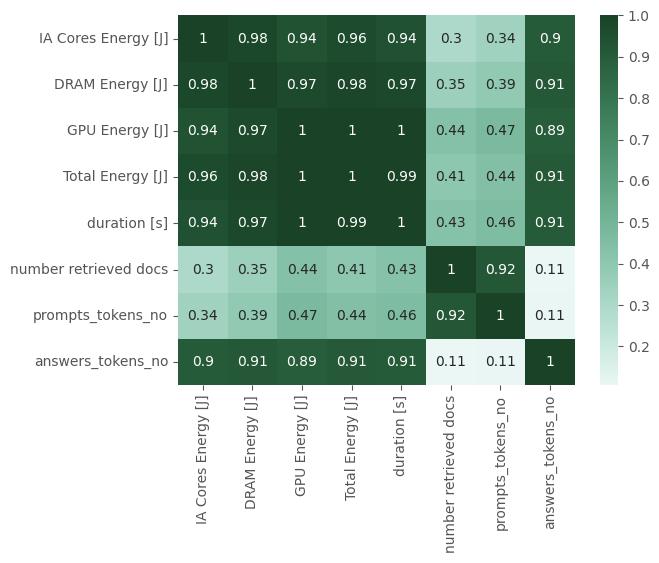

In [9]:
llama_correlations = llama_retrieved_docs_variation_runs.corr(method="spearman")
sns.heatmap(llama_correlations, annot=True, cmap=color_map)

In [10]:
compute_kruskal_wallis(
    llama_retrieved_docs_variation_runs, "number retrieved docs", [1, 2, 3, 4, 5], "duration [s]"
)

KruskalResult(statistic=np.float64(96.66519473053904), pvalue=np.float64(5.041428937903588e-20))

In [11]:
compute_kruskal_wallis(
    llama_retrieved_docs_variation_runs,
    "number retrieved docs",
    [1, 2, 3, 4, 5],
    "Total Energy [J]",
)

KruskalResult(statistic=np.float64(86.40331592814391), pvalue=np.float64(7.64182163532305e-18))

In [12]:
for i in range(4):
    print(i + 1, compute_wilcoxon(llama_retrieved_docs_variation_runs, i + 1,  i + 2, "duration [s]", "number retrieved docs"))

1 WilcoxonResult(statistic=np.float64(1493.0), pvalue=np.float64(0.00019382545252393638))
2 WilcoxonResult(statistic=np.float64(1327.0), pvalue=np.float64(1.9016667139855487e-05))
3 WilcoxonResult(statistic=np.float64(1691.0), pvalue=np.float64(0.0020682327287513905))
4 WilcoxonResult(statistic=np.float64(2386.0), pvalue=np.float64(0.31635102717936164))


In [13]:
for i in range(4):
    print(i + 1, compute_wilcoxon(llama_retrieved_docs_variation_runs, i + 1,  i + 2, "Total Energy [J]", "number retrieved docs"))

1 WilcoxonResult(statistic=np.float64(1703.0), pvalue=np.float64(0.0023544347688783615))
2 WilcoxonResult(statistic=np.float64(1292.0), pvalue=np.float64(1.1203178459018643e-05))
3 WilcoxonResult(statistic=np.float64(1703.0), pvalue=np.float64(0.0023544347688783615))
4 WilcoxonResult(statistic=np.float64(2338.0), pvalue=np.float64(0.26012283897418387))


### 2. Gemma 2 2b and Llama 3.2 1B

In [14]:
gemma_retrieved_docs_variation_runs["model"] = "gemma"
llama_retrieved_docs_variation_runs["model"] = "llama"

retrieved_docs_variation_runs = pd.concat(
    [gemma_retrieved_docs_variation_runs, llama_retrieved_docs_variation_runs]
)
retrieved_docs_variation_runs

,IA Cores Energy [J],DRAM Energy [J],GPU Energy [J],Total Energy [J],duration [s],number retrieved docs,prompts_tokens_no,answers_tokens_no,model
run_index,,,,,,,,,
0,47.93448,3.10618,41.15837,92.19903,2.400032,1,346,25,gemma
1,316.82937,21.76218,191.94780,530.53935,13.422673,1,453,207,gemma
2,157.93547,10.46364,89.03587,257.43498,6.946329,1,241,102,gemma
3,273.84951,17.91603,180.27812,472.04366,12.084191,1,390,200,gemma
4,121.80762,7.85026,95.34998,225.00786,5.509120,1,510,67,gemma
...,...,...,...,...,...,...,...,...,...
95,87.39940,8.42776,322.06680,417.89396,10.967489,5,1660,454,llama
96,48.93790,4.89467,198.23298,252.06555,7.174188,5,1868,259,llama
97,59.98124,5.99841,247.99731,313.97696,8.784207,5,1525,361,llama


In [15]:
retrieved_docs_variation_runs.groupby(["model", "number retrieved docs"]).aggregate(
    lambda x: str(round(x.mean(), 2)) + " ± " + str(get_ci_deviation(x))
)

IA Cores Energy [J] DRAM Energy [J]  \
model number retrieved docs                                       
gemma 1                          140.85 ± 17.22    15.16 ± 1.87   
      2                          149.64 ± 15.79    16.64 ± 1.76   
      3                          178.48 ± 18.61    19.77 ± 2.07   
      4                           218.95 ± 20.8     24.07 ± 2.3   
      5                           250.0 ± 22.31    27.34 ± 2.45   
llama 1                             48.07 ± 5.9     4.38 ± 0.51   
      2                            51.19 ± 3.41     5.05 ± 0.33   
      3                            59.36 ± 3.41     5.88 ± 0.34   
      4                             64.85 ± 3.8     6.49 ± 0.38   
      5                            66.51 ± 4.42     6.64 ± 0.44   

                             GPU Energy [J] Total Energy [J]  duration [s]  \
model number retrieved docs                                                  
gemma 1                      142.58 ± 16.69    298.6 ± 35.49  10.32 ± 1.25   
      2                      166.34 ± 16.54   332.62 ± 33.97   11.75 ± 1.2   
      3                      215.24 ± 19.95   413.49 ± 40.49  14.38 ± 1.45   
      4                      274.72 ± 22.09   517.73 ± 45.04  17.89 ± 1.62   
      5                      312.35 ± 23.47   589.68 ± 47.96  20.35 ± 1.73   
llama 1                      156.35 ± 17.73    208.8 ± 23.71   5.51 ± 0.62   
      2                      187.14 ± 12.66    243.38 ± 16.3   6.72 ± 0.45   
      3                      226.41 ± 12.69   291.65 ± 16.35   8.04 ± 0.46   
      4                      255.15 ± 14.88    326.49 ± 19.0   9.03 ± 0.53   
      5                      261.56 ± 16.82     334.7 ± 21.6   9.23 ± 0.61   

                            prompts_tokens_no answers_tokens_no  
model number retrieved docs                                      
gemma 1                        362.94 ± 21.99    153.34 ± 20.08  
      2                        681.55 ± 32.49    166.12 ± 18.89  
      3                       1018.26 ± 42.67    194.19 ± 22.17  
      4                       1353.32 ± 49.68     235.12 ± 24.2  
      5                       1690.76 ± 56.45    262.31 ± 25.15  
llama 1                        362.94 ± 21.99    321.42 ± 37.63  
      2                        681.55 ± 32.49    356.26 ± 24.97  
      3                       1018.26 ± 42.67     384.59 ± 21.7  
      4                       1353.32 ± 49.68    395.17 ± 25.11  
      5                       1690.76 ± 56.45    377.31 ± 28.04

Text(0.5, 1.0, 'Energy consumption as a function of language model and number of retrieved documents')

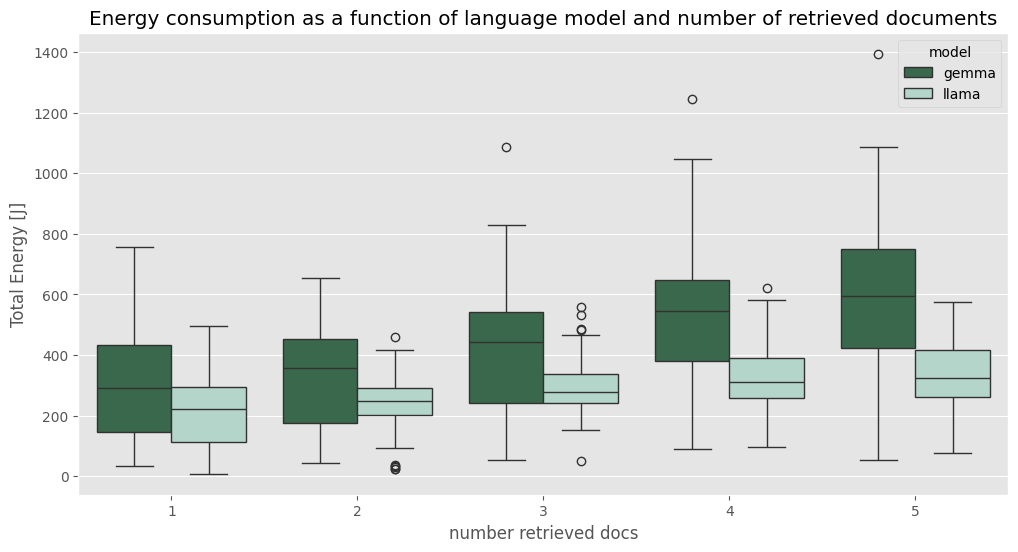

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 6)
sns.boxplot(
    retrieved_docs_variation_runs,
    hue="model",
    y="Total Energy [J]",
    x="number retrieved docs",
    palette=[colors[1], colors[4]],
    linewidth=1,
)
plt.title("Energy consumption as a function of language model and number of retrieved documents")

Text(0.5, 1.0, 'Duration as a function of language model and number of retrieved documents')

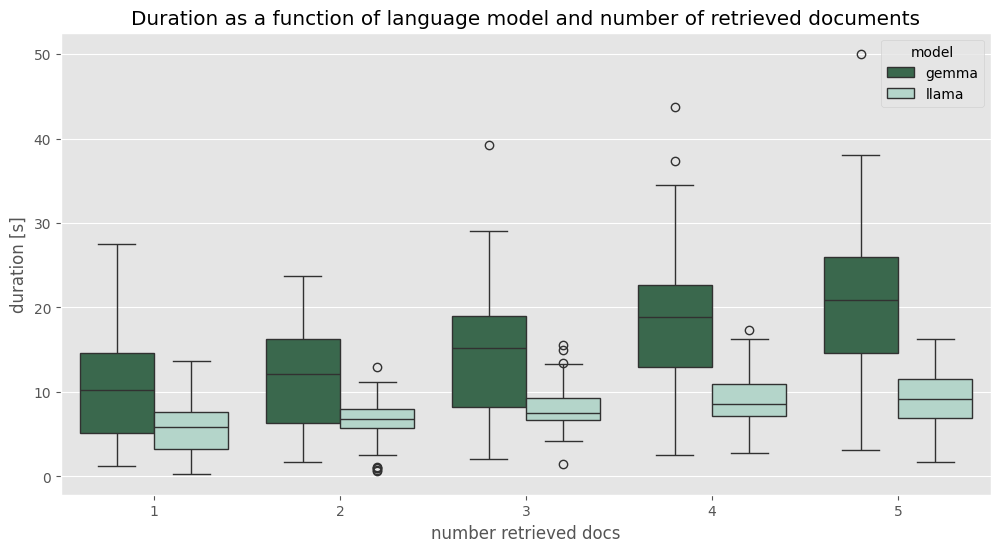

In [17]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 6)
sns.boxplot(
    retrieved_docs_variation_runs,
    hue="model",
    y="duration [s]",
    x="number retrieved docs",
    palette=[colors[1], colors[4]],
    linewidth=1,
)
plt.title("Duration as a function of language model and number of retrieved documents")

In [18]:
pd.DataFrame(
    (
        gemma_retrieved_docs_variation_runs.drop("model", axis=1)
        / llama_retrieved_docs_variation_runs.drop("model", axis=1)
    )
    .drop(["number retrieved docs", "prompts_tokens_no", "answers_tokens_no"], axis=1)
    .mean()
).rename({0: "gemma / llama"}, axis=1)

,gemma / llama
IA Cores Energy [J],4.299020
DRAM Energy [J],4.810012
GPU Energy [J],1.366517
Total Energy [J],2.056277
duration [s],2.567771


In [19]:
compute_wilcoxon(
    retrieved_docs_variation_runs, "llama", "gemma", "duration [s]", "model"
)

WilcoxonResult(statistic=np.float64(10611.0), pvalue=np.float64(1.4559261500692121e-58))

In [20]:
compute_wilcoxon(
    retrieved_docs_variation_runs, "llama", "gemma", "Total Energy [J]", "model"
)

WilcoxonResult(statistic=np.float64(20738.0), pvalue=np.float64(1.0478274078420251e-38))